
# Tyre strategies during a race

Plot all drivers' tyre strategies during a race.


In [1]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

Matplotlib is building the font cache; this may take a moment.


Load the race session



In [2]:
session = fastf1.get_session(2022, "Hungary", 'R')
session.load()
laps = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\Adhenz\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching tr

Get the list of driver numbers



In [3]:
drivers = session.drivers
print(drivers)

['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


Convert the driver numbers to three letter abbreviations



In [4]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'HAM', 'RUS', 'SAI', 'PER', 'LEC', 'NOR', 'ALO', 'OCO', 'VET', 'STR', 'GAS', 'ZHO', 'MSC', 'RIC', 'MAG', 'ALB', 'LAT', 'TSU', 'BOT']


We need to find the stint length and compound used
for every stint by every driver.
We do this by first grouping the laps by the driver,
the stint number, and the compound.
And then counting the number of laps in each group.



In [5]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

The number in the LapNumber column now stands for the number of observations
in that group aka the stint length.



In [6]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT            2
1     ALB    2.0   MEDIUM           19
2     ALB    3.0   MEDIUM           19
3     ALB    4.0     SOFT           29
4     ALO    1.0   MEDIUM           21
..    ...    ...      ...          ...
57    VET    2.0   MEDIUM           31
58    VET    3.0   MEDIUM           23
59    ZHO    1.0   MEDIUM           27
60    ZHO    2.0     HARD           24
61    ZHO    3.0     SOFT           18

[62 rows x 4 columns]


Now we can plot the strategies for each driver



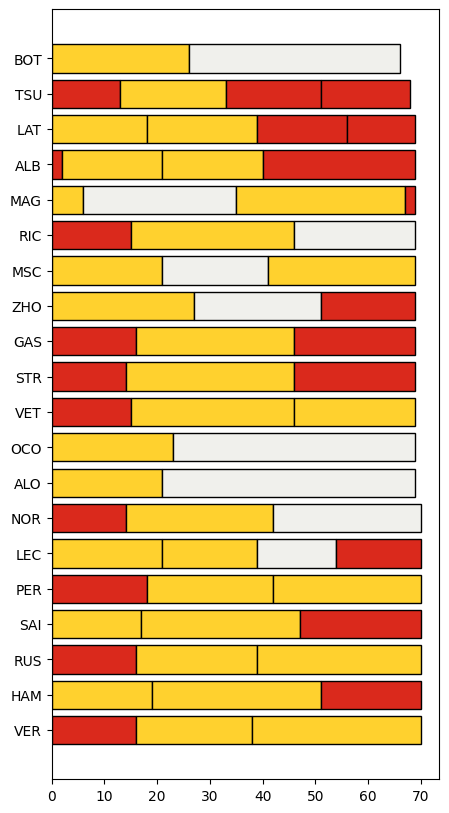

In [7]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

Make the plot more readable and intuitive



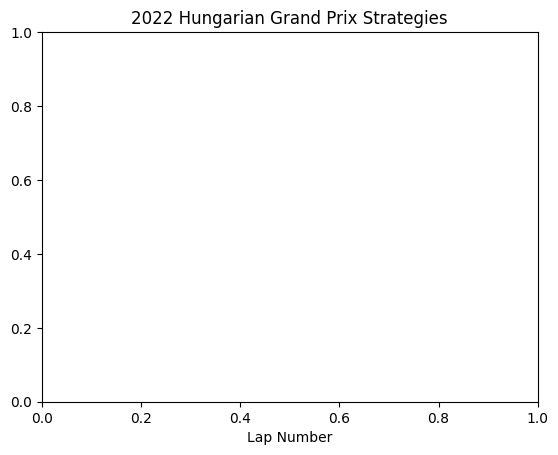

In [8]:
plt.title("2022 Hungarian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

Plot aesthetics



In [9]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>